In [64]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\Anbarasan\Time Series Datasets\Customers_in_a_Shop_TS.csv")

In [3]:
data.head()

,Time,Sales
0,1949-01,114.0
1,1949-02,120.0
2,1949-03,134.0
3,1949-04,67.0
4,1949-05,123.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    144 non-null    object 
 1   Sales   140 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [5]:
data["Time"]=pd.to_datetime(data["Time"])

In [6]:
data.isnull().sum()

Time     0
Sales    4
dtype: int64

In [7]:
df=pd.DataFrame(data)

In [8]:
df.set_index(df["Time"],inplace=True)
del df["Time"]

In [9]:
df["Sales"].index[(df["Sales"].isnull())]


DatetimeIndex(['1951-06-01', '1951-07-01', '1954-06-01', '1960-03-01'], dtype='datetime64[ns]', name='Time', freq=None)

In [10]:
df.loc['1951-06-01'].fillna((df['1949-06-01':'1950-06-01':12].sum())/(df['1949-06-01':'1950-06-01':12].shape[0]),inplace=True)
df.loc['1951-07-01'].fillna((df['1949-07-01':'1951-07-01':12].sum())/(df['1949-07-01':'1951-07-01':12].shape[0]),inplace=True)
df.loc['1954-06-01'].fillna((df['1949-06-01':'1954-06-01':12].sum())/(df['1949-06-01':'1954-06-01':12].shape[0]),inplace=True)
df.loc['1960-03-01'].fillna((df['1949-03-01':'1959-03-01':12].sum())/(df['1949-03-01':'1959-03-01':12].shape[0]),inplace=True)

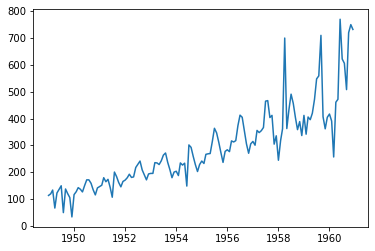

In [11]:
plt.plot(df["Sales"])

In [12]:
train=df.iloc[:116,:]
test=df.iloc[116:,:]

In [13]:
#base forecasting

In [14]:
#naive 
df_1=df.copy()
df_1["Naive"]=np.NaN
df_1["Naive"][1:]=df["Sales"][:len(df)-1]

In [15]:
df_1["Naive"].loc['1961-01-01']=df["Sales"]['1960-12-01']

In [16]:
#simple average
df_1["SA"]=np.NaN
df_1["SA"]=df["Sales"].mean()

In [17]:
#simple moving average
df_1["SMA"]=np.NaN
df_1["SMA"]=df["Sales"].rolling(4).mean()

In [18]:
#simple exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
df_1["SES"]=np.NaN
ses=SimpleExpSmoothing(df["Sales"])
ses_model=ses.fit(0.0128)
df_1["SES"]=ses_model.predict(df.index.min(),df.index.max())


C:\Users\Anbarasan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


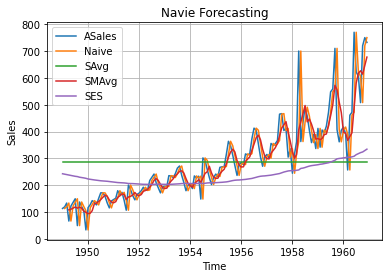

In [19]:
plt.title("Navie Forecasting")
plt.ylabel("Sales")
plt.xlabel("Time")
plt.rcParams["figure.figsize"]=(14,8)
plt.plot(df_1["Sales"],label="ASales")
plt.plot(df_1["Naive"],label="Naive")
plt.plot(df_1["SA"],label="SAvg")
plt.plot(df_1["SMA"],label="SMAvg")
plt.plot(df_1["SES"],label="SES")
plt.legend(loc="best")
plt.grid()

In [20]:
# middle forecasting

In [21]:
#1 visualize wthether there is a time series components in the time series data or not

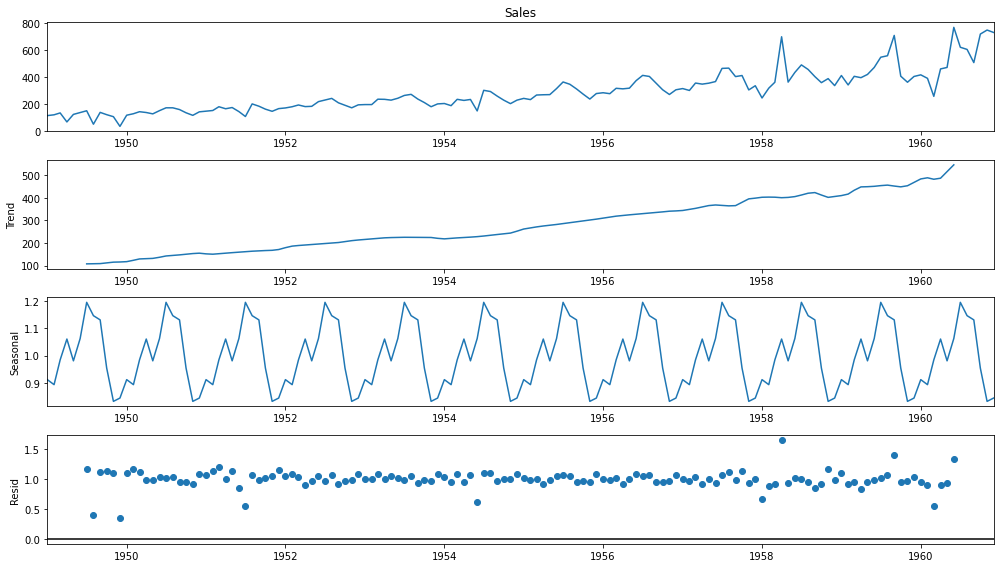

In [22]:
import statsmodels.api as sm
dcomp=sm.tsa.seasonal_decompose(df["Sales"],model="multiplicative")
dcomp.plot();

In [23]:
#holt exponential smoothing

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
df_1["ExpS"]=np.NaN
es=ExponentialSmoothing(df["Sales"],trend="multiplicative",seasonal_periods=12)
model=es.fit(0.013,0.3)
df_1["ExpS"]=model.predict(df_1.index.min(),df_1.index.max())


C:\Users\Anbarasan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [25]:
forecast_exps=model.forecast(12)

In [26]:
#holt winter's exponential smoothing

In [37]:
from scipy.stats import boxcox

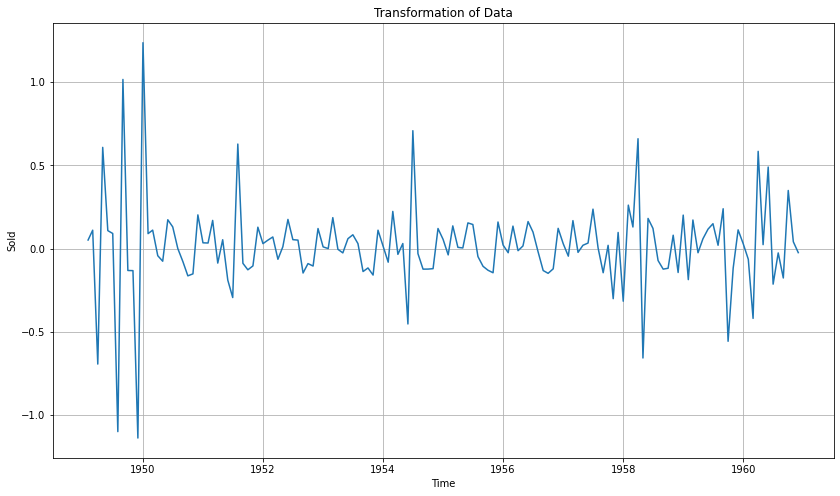

In [38]:
bxcx_data=pd.Series(boxcox(df["Sales"],lmbda=0),index=df.index)
bxcx_data_diff=pd.Series(bxcx_data.diff(),index=df.index)
plt.title("Transformation of Data")
plt.ylabel("Sold")
plt.xlabel("Time")
plt.plot(bxcx_data_diff)
plt.grid()


In [40]:
train_bxdf=df.iloc[:115,:]
test_bxdf=df.iloc[:115,:]

In [41]:
df1=pd.DataFrame(bxcx_data_diff)
df1.colums=["Sales"]


In [42]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
es=ExponentialSmoothing(df["Sales"],trend="multiplicative",seasonal="multiplicative",seasonal_periods=12)
model=es.fit(0.0128,0.4)
df_2=df.copy()
forecast=model.predict(df_2.index.min(),df_2.index.max())
#df_2["HWinter's_bx"]=df_2["HWinter's_bxdf"].cumsum()
#df_2["HWinter's_bx"]=df_2["HWinter's_bx"].add(bxcx_data[0])
#df_2["HWinter's Forecast"]=np.exp(df_2["HWinter's_bx"])


C:\Users\Anbarasan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


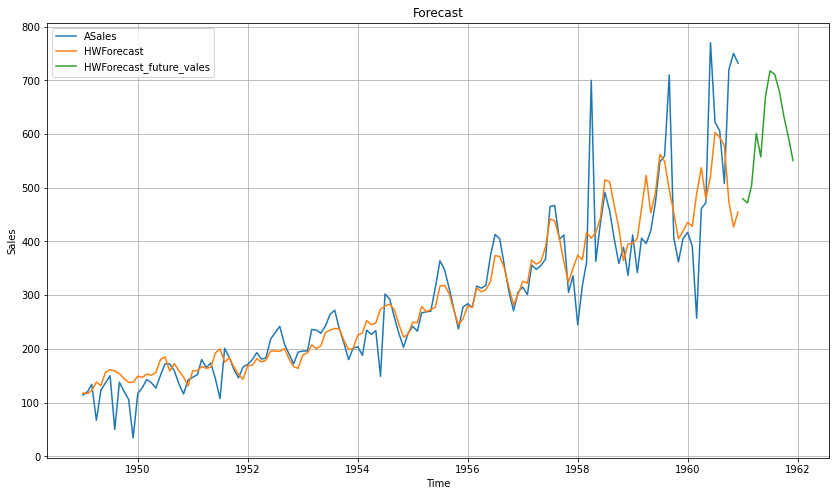

In [43]:
future_values=model.forecast(12)
plt.title("Forecast")
plt.ylabel("Sales")
plt.xlabel("Time")
plt.rcParams["figure.figsize"]=(14,8)
plt.plot(df["Sales"],label="ASales")
plt.plot(forecast,label="HWForecast")
plt.plot(future_values,label="HWForecast_future_vales")
plt.legend(loc="best")
plt.grid()

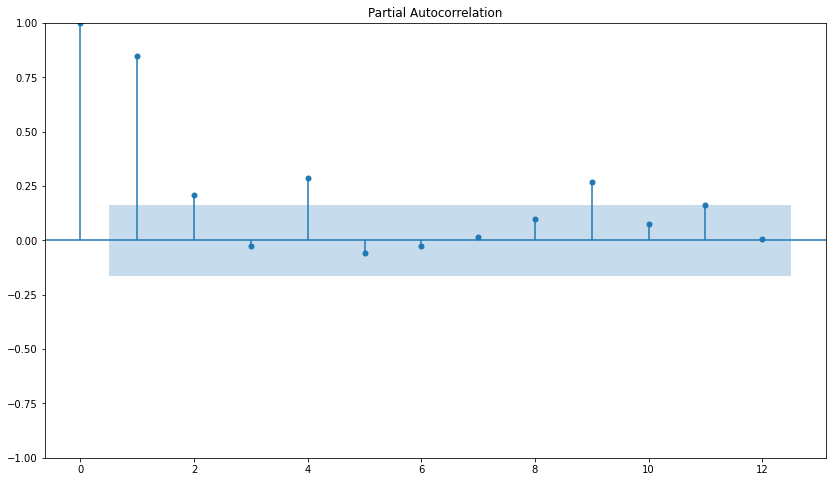

In [44]:
from statsmodels.graphics.tsaplots import plot_pacf 
plot_pacf(df,ax=plt.gca(),lags=12)
plt.show();

In [45]:
from statsmodels.tsa.arima.model import ARIMA
arima=ARIMA(bxcx_data_diff,order=(4,0,0))
model=arima.fit()
df_3=df.copy()
df_3["bxcx_data_diff"]=model.predict(df.index.min(),df.index.max())
df_3["bxcx_data"]=df_3["bxcx_data_diff"].cumsum()
df_3["bxcx_data"]=df_3["bxcx_data"].add(bxcx_data[0])
df_3["Forecast"]=np.exp(df_3["bxcx_data"])

C:\Users\Anbarasan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Anbarasan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Anbarasan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


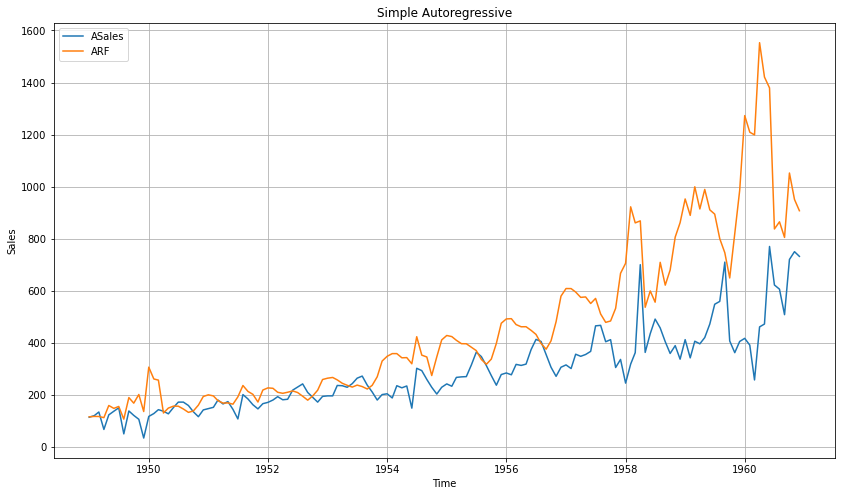

In [58]:
plt.title("Simple Autoregressive")
plt.ylabel("Sales")
plt.xlabel("Time")
plt.plot(df_3["Sales"],label="ASales")
plt.plot(df_3["Forecast"],label="ARF")
#plt.plot(forecast,label="Future_Forecast")
plt.legend(loc="best")
plt.grid(True)

In [61]:
from statsmodels.tsa.arima.model import ARIMA
arima=ARIMA(bxcx_data_diff,order=(0,0,12))
model=arima.fit()
df_4=df.copy()
df_4["bxcx_data_diff"]=model.predict(df.index.min(),df.index.max())
df_4["bxcx_data"]=df_4["bxcx_data_diff"].cumsum()
df_4["bxcx_data"]=df_4["bxcx_data"].add(bxcx_data[0])
df_4["Forecast"]=np.exp(df_4["bxcx_data"])

C:\Users\Anbarasan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Anbarasan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Anbarasan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Anbarasan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


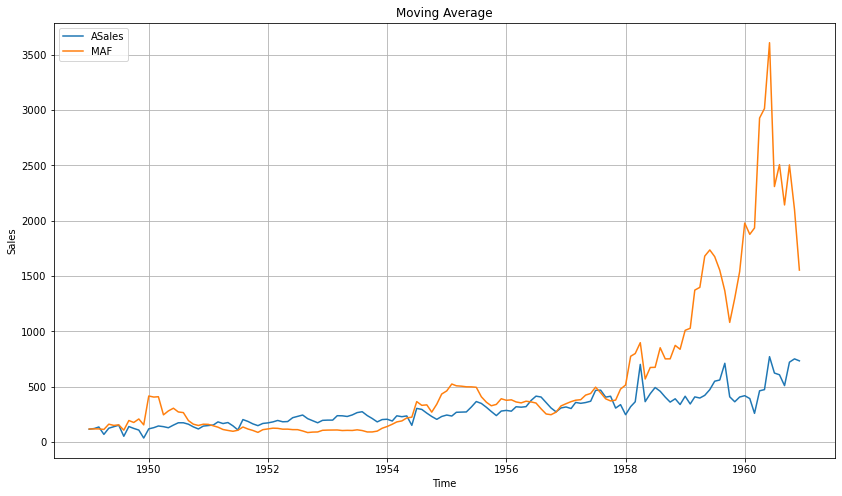

In [62]:
plt.title("Moving Average")
plt.ylabel("Sales")
plt.xlabel("Time")
plt.plot(df_4["Sales"],label="ASales")
plt.plot(df_4["Forecast"],label="MAF")
#plt.plot(forecast,label="Future_Forecast")
plt.legend(loc="best")
plt.grid(True)

In [63]:
from statsmodels.tsa.arima.model import ARIMA
arima=ARIMA(df,order=(4,0,4))
model=arima.fit()
"""df_5=df.copy()
df_5["bxcx_data_diff"]=model.predict(df.index.min(),df.index.max())
df_5["bxcx_data"]=df_5["bxcx_data_diff"].cumsum()
df_5["bxcx_data"]=df_5["bxcx_data"].add(bxcx_data[0])
df_5["Forecast"]=np.exp(df_5["bxcx_data"])"""

C:\Users\Anbarasan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Anbarasan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Anbarasan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Anbarasan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


'df_5=df.copy()\ndf_5["bxcx_data_diff"]=model.predict(df.index.min(),df.index.max())\ndf_5["bxcx_data"]=df_5["bxcx_data_diff"].cumsum()\ndf_5["bxcx_data"]=df_5["bxcx_data"].add(bxcx_data[0])\ndf_5["Forecast"]=np.exp(df_5["bxcx_data"])'

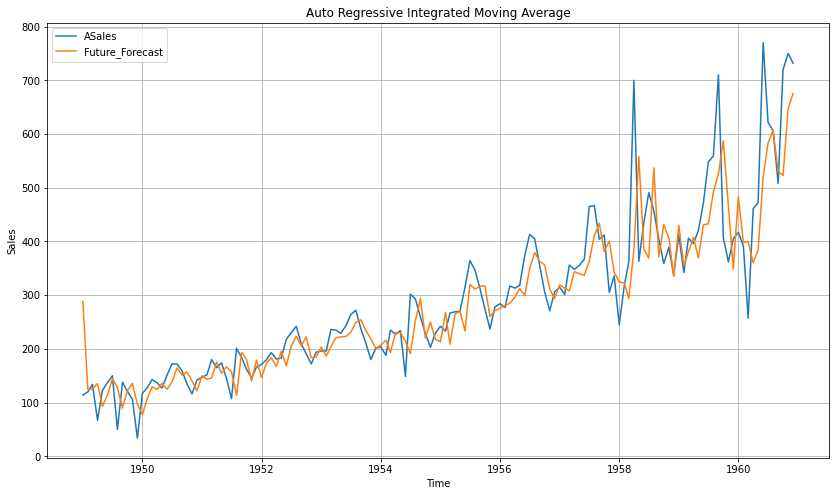

In [52]:
plt.title("Auto Regressive Integrated Moving Average")
plt.ylabel("Sales")
plt.xlabel("Time")
plt.plot(df["Sales"],label="ASales")
#plt.plot(df_5["Forecast"],label="ARIMA")
#plt.plot(forecast,label="Future_Forecast")
plt.plot(model.predict(df.index.min(),df.index.max()),label="Future_Forecast")
plt.legend(loc="best")
plt.grid(True)